# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Rafly Rangghani Putra
- **Email:** raflyrangga78@gmail.com
- **ID Dicoding:** raflyranggha

## Menentukan Pertanyaan Bisnis

- Apakah tren penggunaan sepeda bersama di Washington D.C. berbeda antara pengguna terdaftar (registered) dan pengguna biasa (casual) di tahun 2011 dan 2012?
- Bagaimana pola penggunaan sepeda berdasarkan musim?
- Apakah ada perbedaan dalam penggunaan sepeda antara hari kerja dan akhir pekan?
- Bagaimana distribusi penggunaan sepeda selama jam-jam tertentu dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [ ]:
!pip install streamlit # install the streamlit package
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from babel.numbers import format_currency
sns.set(style='dark')

## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

## Menilai tabel **day_df**

In [ ]:
# Assesing day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


## Menilai tabel **hour_df**

In [ ]:
# Assesing hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- The dteday columns in day_df and hour_df are still data object types. This can be converted to the **datetime** data type

In [ ]:
# Check for missing values in day_df
print("\nMissing values in day_df:\n", day_df.isnull().sum())


Missing values in day_df:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [ ]:
# Check for missing values in hour_df
print("\nMissing values in hour_df:\n", hour_df.isnull().sum())


Missing values in hour_df:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- There are no missing values in both day_df and hour_df

In [ ]:
# Check for duplicate values in hour_df
print("\nDuplicate values in hour_df:", hour_df.duplicated().sum())


Duplicate values in hour_df: 0


**Insight:**
- There are no duplicate values in both day_df and hour_df

In [ ]:
# Check for invalid values in day_df
print("\nInvalid values in day_df (e.g., negative counts):")
for column in ['casual', 'registered', 'cnt']:
  print(f"  - {column}: {day_df[day_df[column] < 0].shape[0]}")


Invalid values in day_df (e.g., negative counts):
  - casual: 0
  - registered: 0
  - cnt: 0


In [ ]:
# Check for invalid values in hour_df
print("\nInvalid values in hour_df (e.g., negative counts):")
for column in ['casual', 'registered', 'cnt']:
  print(f"  - {column}: {hour_df[hour_df[column] < 0].shape[0]}")


Invalid values in hour_df (e.g., negative counts):
  - casual: 0
  - registered: 0
  - cnt: 0


**Insight:**
- There are no invalid values in both day_df and hour_df

### Cleaning Data

In [ ]:
# Mengubah tipe data dari object ke datetime pada kolom dteday
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- The dteday data type is changed from object to datetime

In [ ]:
# Change the name of the columns in day_df
day_df = day_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
})

# Change the name of the columns in hour_df
hour_df = hour_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour'
})

In [ ]:
day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
# Mapping values for 'season', 'yr', 'mnth', 'weekday', 'weathersit'
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
yr_mapping = {0: '2011', 1: '2012'}
mnth_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
weekday_mapping = {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}
weathersit_mapping = {1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'}

# Apply the mappings to the respective columns
day_df['season'] = day_df['season'].map(season_mapping)
day_df['year'] = day_df['year'].map(yr_mapping)
day_df['month'] = day_df['month'].map(mnth_mapping)
day_df['weekday'] = day_df['weekday'].map(weekday_mapping)
day_df['weathersit'] = day_df['weathersit'].map(weathersit_mapping)

In [ ]:
day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,Sat,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sun,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Mon,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tue,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wed,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Mapping values for 'season', 'yr', 'mnth', 'weekday', 'weathersit'
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
yr_mapping = {0: '2011', 1: '2012'}
mnth_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
weekday_mapping = {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}
weathersit_mapping = {1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'}

# Apply the mappings to the respective columns
hour_df['season'] = hour_df['season'].map(season_mapping)
hour_df['year'] = hour_df['year'].map(yr_mapping)
hour_df['month'] = hour_df['month'].map(mnth_mapping)
hour_df['weekday'] = hour_df['weekday'].map(weekday_mapping)
hour_df['weathersit'] = hour_df['weathersit'].map(weathersit_mapping)

In [ ]:
hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,0,Sat,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,Sat,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,Sat,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,Sat,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,Sat,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:

day_df.to_csv('day_cleaned.csv', index=False)
hour_df.to_csv('hour_cleaned.csv', index=False)


### Explore

In [ ]:
# Menghitung jumlah registered dan casual menggunakan groupby dan count
day_df.groupby(['year'])[['registered', 'casual']].sum()

,registered,casual
year,,
2011,995851,247252
2012,1676811,372765


**Insight:**
- Most users were in 2012
- There are more registered users than casual users


In [ ]:
# Hitung pengguna terbanyak berdasarkan season
season_cnt = day_df.groupby('season')['cnt'].sum().sort_values(ascending=False)
print("Pengguna terbanyak berdasarkan season:\n", season_cnt)

# Hitung pengguna terbanyak berdasarkan hari
weekday_cnt = day_df.groupby('weekday')['cnt'].sum().sort_values(ascending=False)
print("\nPengguna terbanyak berdasarkan hari:\n", weekday_cnt)

# Hitung pengguna terbanyak berdasarkan working day
workingday_cnt = day_df.groupby('workingday')['cnt'].sum().sort_values(ascending=False)
print("\nPengguna terbanyak berdasarkan working day:\n", workingday_cnt)

# Hitung pengguna terbanyak berdasarkan weathersit
weathersit_cnt = day_df.groupby('weathersit')['cnt'].sum().sort_values(ascending=False)
print("\nPengguna terbanyak berdasarkan weathersit:\n", weathersit_cnt)

# Hitung pengguna terbanyak berdasarkan holiday
holiday_cnt = day_df.groupby('holiday')['cnt'].sum().sort_values(ascending=False)
print("\nPengguna terbanyak berdasarkan holiday:\n", holiday_cnt)


Pengguna terbanyak berdasarkan season:
 season
Fall      1061129
Summer     918589
Winter     841613
Spring     471348
Name: cnt, dtype: int64

Pengguna terbanyak berdasarkan hari:
 weekday
Fri    487790
Thu    485395
Sat    477807
Wed    473048
Tue    469109
Mon    455503
Sun    444027
Name: cnt, dtype: int64

Pengguna terbanyak berdasarkan working day:
 workingday
1    2292410
0    1000269
Name: cnt, dtype: int64

Pengguna terbanyak berdasarkan weathersit:
 weathersit
Clear              2257952
Mist                996858
Light Snow/Rain      37869
Name: cnt, dtype: int64

Pengguna terbanyak berdasarkan holiday:
 holiday
0    3214244
1      78435
Name: cnt, dtype: int64


**Insight:**
- The highest users occurred in the Fall season with 1,061,129 users
- Friday (Fri) has the highest number of users with 487,790 users
- Working days (workingday = 1) have a higher number of users (2,292,410) than holidays (1,000,269)
- Clear weather conditions (Clear) have the highest users with 2,257,952.


In [ ]:
hour_df.groupby('hour')['cnt'].sum().sort_values(ascending=False)


,cnt
hour,
17,336860
18,309772
8,261001
16,227748
19,226789
13,184919
12,184414
15,183149
14,175652


**Insight:**
- 17.00 is the most time the bicycle is used

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah tren penggunaan sepeda bersama di Washington D.C. berbeda antara pengguna terdaftar (registered) dan pengguna biasa (casual) di tahun 2011 dan 2012?

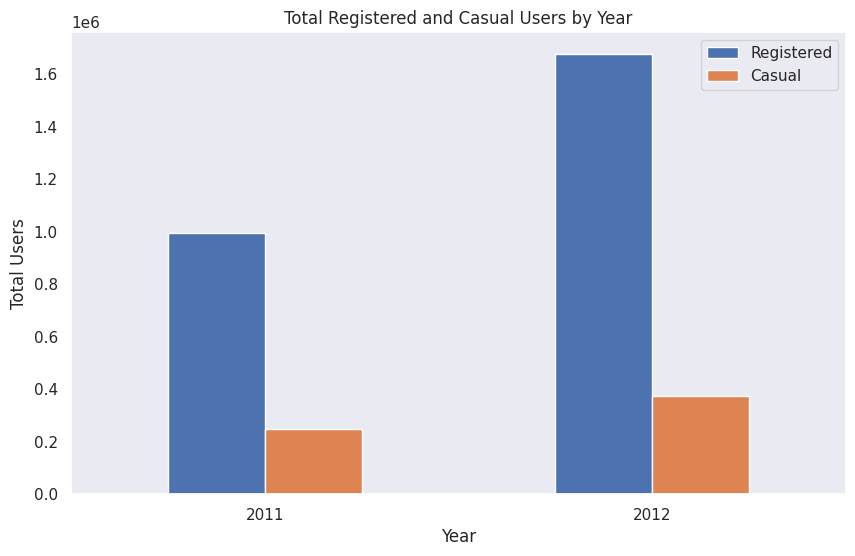

In [ ]:
# Check if 'year' column exists in day_df
if 'year' in day_df.columns:
    # Group data by year and calculate the total registered and casual users
    yearly_user_counts = day_df.groupby('year')[['registered', 'casual']].sum()

    # Check if yearly_user_counts is not empty
    if not yearly_user_counts.empty:
        # Create a bar chart
        yearly_user_counts.plot(kind='bar', figsize=(10, 6))

        # Customize the chart
        plt.title('Total Registered and Casual Users by Year')
        plt.xlabel('Year')
        plt.ylabel('Total Users')
        plt.xticks(rotation=0)  # Rotate x-axis labels if needed
        plt.legend(['Registered', 'Casual'])

        # Display the chart
        plt.show()
    else:
        print("No data found for years 2011 and 2012.")
else:
    print("The 'year' column does not exist in the DataFrame.")

**Insight:**
- Registered users are more numerous than casual users
- 2012 was a year that had more bicycle users than 2011

### Pertanyaan 2: Bagaimana pola penggunaan sepeda berdasarkan musim?

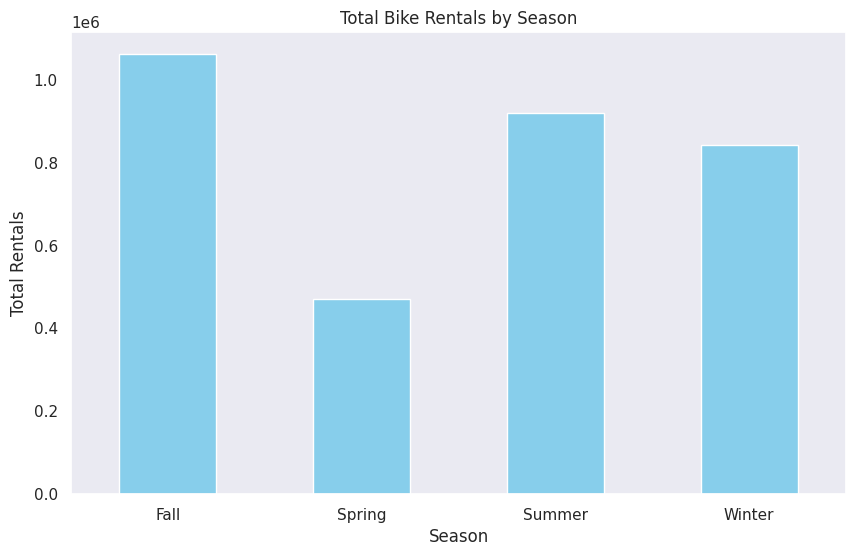

In [ ]:
# Group data by season and calculate the total bike rentals
season_counts = day_df.groupby('season')['cnt'].sum()

# Create a bar chart
plt.figure(figsize=(10, 6))
season_counts.plot(kind='bar', color='skyblue')
plt.title('Total Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.xticks(rotation=0)
plt.show()


**Insight:**
- Autumn has the most bicycle users among spring, summer and winter

### Pertanyaan 3: Apakah ada perbedaan dalam penggunaan sepeda antara hari kerja, akhir pekan, dan hari libur?

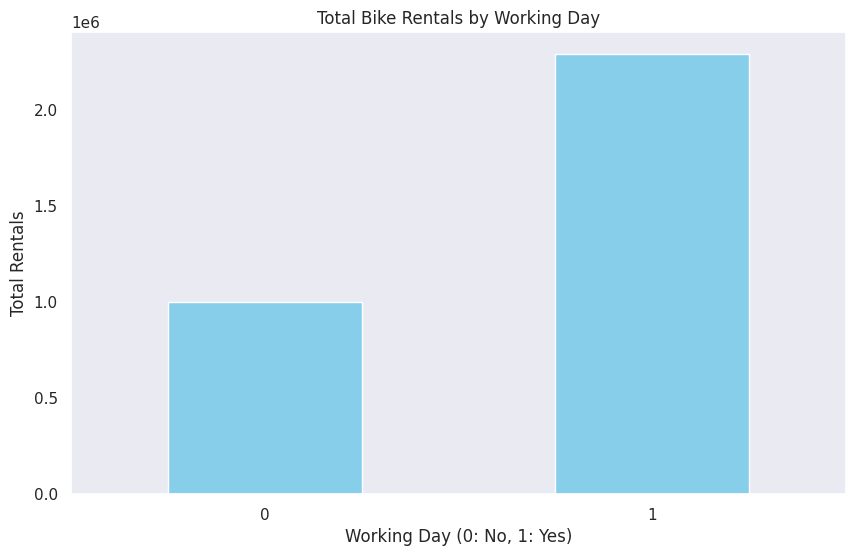

In [ ]:
# Group data by workingday and calculate the total bike rentals
workingday_counts = day_df.groupby('workingday')['cnt'].sum()

# Create a bar chart
plt.figure(figsize=(10, 6))
workingday_counts.plot(kind='bar', color='skyblue')
plt.title('Total Bike Rentals by Working Day')
plt.xlabel('Working Day (0: No, 1: Yes)')
plt.ylabel('Total Rentals')
plt.xticks(rotation=0)
plt.show()

**Insight:**
- Bicycle rentals occur more frequently on weekdays

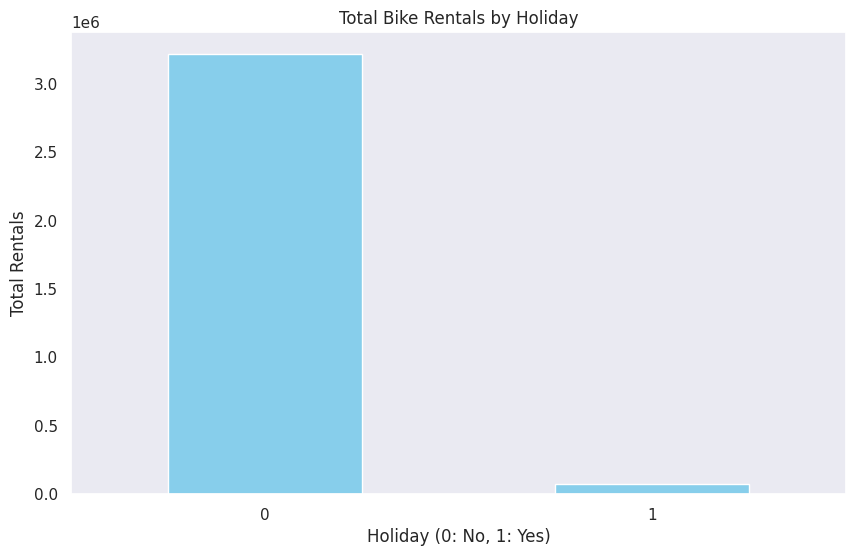

In [ ]:
# Group data by holiday and calculate the total bike rentals
holiday_counts = day_df.groupby('holiday')['cnt'].sum()

# Create a bar chart
plt.figure(figsize=(10, 6))
holiday_counts.plot(kind='bar', color='skyblue')
plt.title('Total Bike Rentals by Holiday')
plt.xlabel('Holiday (0: No, 1: Yes)')
plt.ylabel('Total Rentals')
plt.xticks(rotation=0)
plt.show()

**Insight:**
- Bicycle rentals are more common on non-holiday days

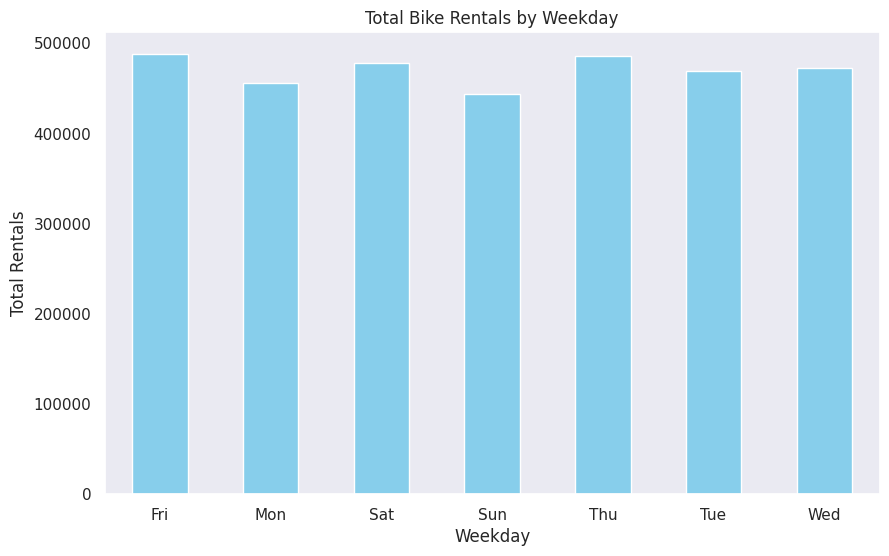

In [ ]:
# Group data by weekday and calculate the total bike rentals
weekday_counts = day_df.groupby('weekday')['cnt'].sum()

# Create a bar chart
plt.figure(figsize=(10, 6))
weekday_counts.plot(kind='bar', color='skyblue')
plt.title('Total Bike Rentals by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Rentals')
plt.xticks(rotation=0)
plt.show()

**Insight:**
- Friday is the day that has the most bicycle users

### Pertanyaan 4: Bagaimana distribusi penggunaan sepeda selama jam-jam tertentu dalam sehari?

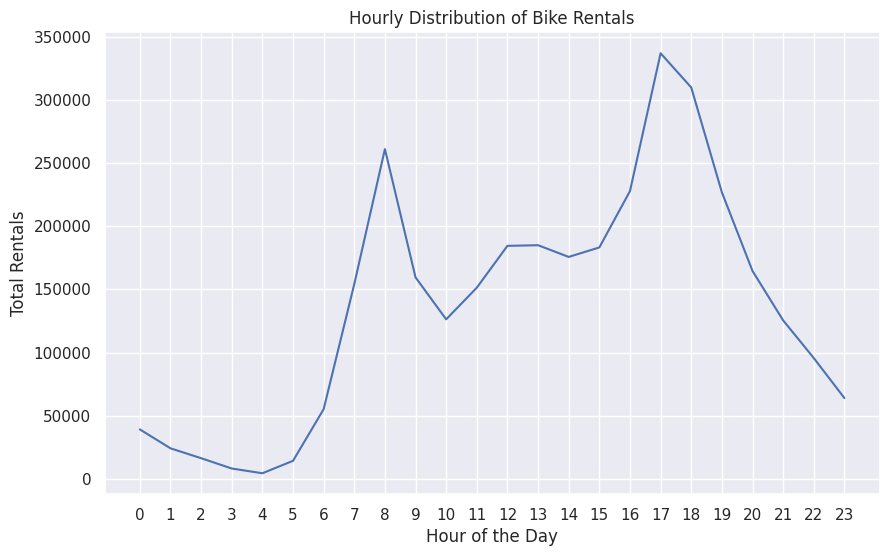

In [ ]:
# Group data by hour and calculate the total bike rentals
hourly_counts = hour_df.groupby('hour')['cnt'].sum()

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(hourly_counts.index, hourly_counts.values)
plt.title('Hourly Distribution of Bike Rentals')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Rentals')
plt.xticks(range(24))
plt.grid(True)
plt.show()

**Insight:**
- 17.00 is the most time the bicycle is used

## Conclusion

- **Pengguna Terdaftar Lebih Mendominasi dan Adanya Peningkatan Penggunaan Sepeda pada Tahun 2012**  
Pengguna yang terdaftar lebih banyak menggunakan layanan penyewaan sepeda dibandingkan dengan pengguna kasual. Ini menunjukkan bahwa layanan berlangganan lebih populer dan kemungkinan lebih menarik bagi mereka yang menggunakan sepeda secara rutin.  Kemudian, terjadi peningkatan yang signifikan dalam jumlah pengguna sepeda pada tahun 2012 dibandingkan tahun 2011. Hal ini bisa disebabkan oleh peningkatan popularitas sepeda sebagai sarana transportasi atau mungkin karena adanya perbaikan infrastruktur yang mendukung penggunaan sepeda.


- **Musim Gugur Menjadi Musim Favorit untuk Bersepeda**  
Musim gugur mencatatkan jumlah pengguna sepeda terbanyak dibandingkan dengan musim semi, musim panas, dan musim dingin. Cuaca yang nyaman pada musim gugur mungkin menjadi salah satu alasan meningkatnya aktivitas bersepeda pada musim ini.


- **Penggunaan Sepeda Lebih Dominan pada Hari Kerja dan Non-Hari Libur**  
Penggunaan sepeda lebih sering terjadi pada hari kerja dibandingkan akhir pekan, dan hari non-libur cenderung mencatatkan lebih banyak penyewaan sepeda. Di antara hari kerja, Jumat adalah hari dengan jumlah pengguna sepeda terbanyak. Ini menunjukkan bahwa sepeda sering digunakan sebagai sarana transportasi harian, terutama untuk kegiatan rutin seperti bekerja atau bersekolah.

- **Puncak Penggunaan Sepeda Terjadi pada Jam Pulang Kerja**  
Pukul 17.00 menjadi waktu puncak penggunaan sepeda, yang kemungkinan besar berkaitan dengan waktu pulang kerja. Hal ini menunjukkan bahwa banyak pengguna memanfaatkan sepeda sebagai alat transportasi saat perjalanan pulang di sore hari.

In [75]:
!pip freeze > requirements.txt
